# 1. Sentiment Analysis:
Problem:  Analyzing sentiment in customer reviews, social media comments, or product feedback to determine whether the sentiment is positive, negative, or neutral.


Dataset:

      - IMDb movie reviews dataset
      - Twitter sentiment analysis dataset
      - Amazon product reviews dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
data.groupby('sentiment').size()

sentiment
negative    25000
positive    25000
dtype: int64

In [5]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [6]:
data.describe().T

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,positive,25000


In [7]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ',data['review'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [8]:
corpus_dataset=pd.DataFrame(corpus)
corpus_dataset.head()

,0
0,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...


In [9]:
corpus_dataset['corpus']=corpus_dataset
corpus_dataset.head()

,0,corpus
0,one review mention watch oz episod hook right ...,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...,petter mattei love time money visual stun film...


In [10]:
corpus_dataset=corpus_dataset.drop([0],axis=1)
corpus_dataset.head()

,corpus
0,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()

In [12]:
x.shape

(1000, 12331)

In [13]:
len(cv.get_feature_names_out())

12331

In [14]:
y=data.iloc[:1000,1].values
y

array(['positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negati

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

from sklearn.naive_bayes import GaussianNB
gauss_clf=GaussianNB()

print('='*70)
print('Training started....  ')
gauss_clf.fit(xtrain,ytrain)
print('\ntesting in progress....')
ypred=gauss_clf.predict(xtest)
print('Predicted class:\n',ypred)
print('='*70)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion matrix:\n',confusion_matrix(ytest,ypred))
print('='*70)
print('Accuracy score:\t',accuracy_score(ytest,ypred))
print('='*70)
print('Classification report:\n',classification_report(ytest,ypred))
print('='*70)

Training started....  

testing in progress....
Predicted class:
 ['negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'positive' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'positive' 'positive' 'negative' 'positive'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'positive' 'negative' 'positive' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'positive' 'negative' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'positive'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'positive' 'negative'
 'negative' 'negative' 'positive' 'positive' 'positive' 'negati

<AxesSubplot: >

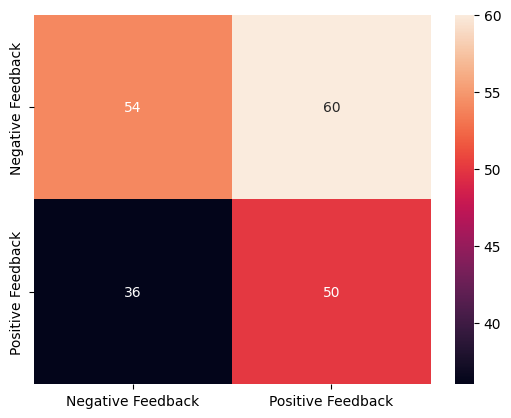

In [16]:
import seaborn as sns

cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True,xticklabels=['Negative Feedback','Positive Feedback'],
           yticklabels=['Negative Feedback','Positive Feedback'])

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Use the entire dataset
X = data['review']
y = data['sentiment']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Train a Multinomial Naive Bayes classifier
mnb_clf = MultinomialNB()
scores = cross_val_score(mnb_clf, X_tfidf, y, cv=5, scoring='accuracy')

# Print average accuracy from cross-validation
print("Average Accuracy:", np.mean(scores))

Average Accuracy: 0.8513


# 2. Text Classification:
Problem: Categorizing text documents into predefined categories or classes, such as classifying news articles into topics like sports, politics, technology, etc.

Dataset:

    - 20 Newsgroups dataset
    - Reuters news dataset
    - spam email classification dataset

In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk

In [34]:
# Load 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X = newsgroups.data
y = newsgroups.target

In [47]:
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [37]:
# Train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [38]:
# Predictions
y_pred = nb_classifier.predict(X_test_tfidf)

In [39]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6835543766578249
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.46      0.52       151
           1       0.58      0.63      0.61       202
           2       0.61      0.63      0.62       195
           3       0.54      0.69      0.61       183
           4       0.76      0.62      0.69       205
           5       0.81      0.79      0.80       215
           6       0.75      0.69      0.72       193
           7       0.70      0.68      0.69       196
           8       0.42      0.73      0.53       168
           9       0.83      0.79      0.81       211
          10       0.90      0.87      0.88       198
          11       0.77      0.75      0.76       201
          12       0.73      0.57      0.64       202
          13       0.81      0.80      0.81       194
          14       0.76      0.75      0.76       189
          15       0.53      0.86      0.65       202
          16       0.67     

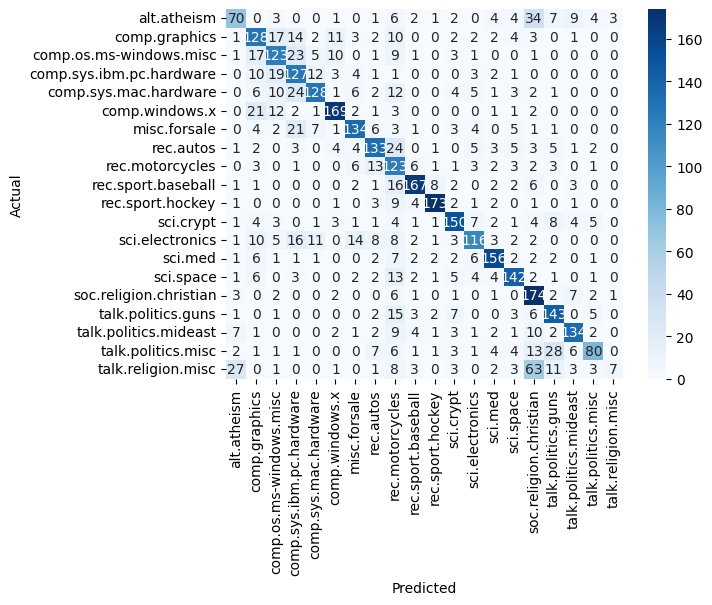

In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
# Print the predicted topics for a few documents
num_documents_to_print = 5

for i in range(num_documents_to_print):
    print(f"Document {i + 1} - Predicted Topic: {newsgroups.target_names[y_pred[i]]}\n")
    print(X_test[i])
    print("\n" + "=" * 80 + "\n")

Document 1 - Predicted Topic: rec.sport.baseball




	The runner can leave his base at any time.  If the ball is caught,
he's got to tag up.  If it isn't caught, he _doesn't_ have to tag up at
all.  So, if he's feeling lucky, your runner at second can sprint for glory
as soon as the ball is popped up.  If it isn't caught, he's probably scored
a run.  If it is, he's probably headed for AAA.  

	The only effect the infield fly has is to make the batter out,
thereby removing the force on the runners on base.  All other rules apply,
as if you were standing second with first open and the ball is popped up.



Document 2 - Predicted Topic: comp.os.ms-windows.misc


Well, it's not an FTP site, but I got an 800 number for Signetics BBS.

The Signetics BBS contain some pretty good items for the 8051.  I am
currently using the following files which I downloaded from them:

    ml-asm51.zip      MetaLink's 8051 family macro assembler
    bootstrp.zip      Hex file Load-and-Go using 8051 uart
    

In [42]:
# Additional code for text preprocessing
warnings.filterwarnings('ignore')
nltk.download('wordnet')
stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ramesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
# Process a sample document
document = 50
doc_sample = 'This disk had failed many times. I would like to get it replaced'
print('Original Document: ')
print(doc_sample)
print('\n\n Tokenized and lemmatized document: ')
print(preprocess(doc_sample))

Original Document: 
This disk had failed many times. I would like to get it replaced


 Tokenized and lemmatized document: 
['disk', 'fail', 'time', 'like', 'replac']


In [44]:
# Process all documents
processed_docs = []
for doc in newsgroups.data:
    processed_docs.append(preprocess(doc))
print(processed_docs[:2])

[['sure', 'basher', 'pen', 'fan', 'pretti', 'confus', 'lack', 'kind', 'post', 'recent', 'pen', 'massacr', 'devil', 'actual', 'puzzl', 'reliev', 'go', 'pittsburgh', 'relief', 'prais', 'pen', 'kill', 'devil', 'wors', 'think', 'jagr', 'show', 'better', 'regular', 'season', 'stat', 'watch', 'playoff', 'bowman', 'jagr', 'coupl', 'game', 'pen', 'go', 'beat', 'pulp', 'jersey', 'disappoint', 'island', 'lose', 'final', 'regular', 'season', 'game', 'pen', 'rule'], ['brother', 'market', 'high', 'perform', 'video', 'card', 'support', 'vesa', 'local', 'suggest', 'idea', 'diamond', 'stealth', 'local', 'orchid', 'farenheit', 'graphic', 'ultra', 'high', 'perform', 'card', 'post', 'email', 'thank', 'matt']]


# 3. Named Entity Recognition (NER):
Problem: Identifying and classifying entities mentioned in text, such as names of persons, organizations, locations, dates, etc.

Dataset:

    - CoNLL 2003 dataset
    - OntoNotes dataset
    - WikiNER dataset

In [48]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/90/f0/0133b684e18932c7bf4075d94819746cee2c0329f2569db526b0fa1df1df/spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd044e6f62a3d317c461f6f0c153c6573ed13025752d779e514000c15dd2/cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for preshe

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [49]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB 1.3 MB/s eta 0:00:10
     --------------------------------------- 0.0/12.8 MB 487.6 kB/s eta 0:00:27
     --------------------------------------- 0.1/12.8 MB 871.5 kB/s eta 0:00:15
     --------------------------------------- 0.2/12.8 MB 919.0 kB/s eta 0:00:14
      --------------------------------------- 0.2/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.3/12.8 MB 1.4 MB/s eta 0:00:10
     - -------------------------------------- 0.5/12.8 MB 1.5 MB/s eta 0:00:09
     - -------------------------------------- 0.6/12.8 MB 1.6 MB/s eta 0:00:08
     -- ------------------------------------- 0.7/12.8 MB 1.8 MB/s eta 0:00:07
     -- ------------------------------------- 0.9/12.8 MB 2.0 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [50]:
import spacy

# Load spaCy English NER model
nlp = spacy.load("en_core_web_sm")

In [57]:
# Example text for NER
text = """
Barack Obama was born in Hawaii and became the 44th President of the United States. 
He served two terms from 2009 to 2017.
"""

# Process the text with spaCy NER
doc = nlp(text)

# Print named entities and their labels
print("Named Entities:")
for ent in doc.ents:
    print(f"{ent.text}: {ent.label_}")

Named Entities:
Barack Obama: LOC
Hawaii: GPE
44th: ORDINAL
the United States: GPE
two: CARDINAL
2009 to 2017: DATE
